# Exercise for UML


# Project Title - Spotify recommender system
## About the Dataset
These dataset contains 114000 song and metadata about the songs such as their popularity and genres. The exercise is divided in three part mainly EDA, PCA and Clustering and finally the recommender system.
Try to write your own functions and know your keyboard shortcuts.
You can work on GoogleCollab or work locally.

The dataset: https://raw.githubusercontent.com/aaubs/ds-master/main/data/spotify.csv


In [170]:
#import relevant libraries
import pandas as pd #EDA 
import matplotlib.pyplot as plt #plots 
import seaborn as sns #plots 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#check out the documentations

# Part 1
## Goals of Part 1
    1. Clean up the dataset and check for duplicates
    2. EDA
    3. Plots
## Relevant libraries for this part
    1. Pandas
    2. Numpy
    3. Matplotlib
    4. Seaborn
    5. Pygwalker



In [171]:
data= pd.read_csv("https://raw.githubusercontent.com/aaubs/ds-master/main/spotify.csv")

data.head(5)
# Understand the dataset. What columns are available?
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [172]:
data.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [173]:
data.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [174]:
# Check for missing values. How would you handle them?
# Are there any outliers or unusual values in the dataset?
data_sort = data.drop(['Unnamed: 0'], axis=1)

In [175]:
data = data_sort.dropna()

In [176]:
data_sort.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [177]:
data_sort.duplicated(subset=['track_id']).count()

114000

In [178]:

duplicates = data_sort[data_sort.duplicated(subset=['track_id'], keep=False)]

In [179]:

duplicates = data_sort[data_sort.duplicated(subset=['track_id'], keep=False)]

if duplicates.empty:
    print("No duplicate track_ids found.")
else:
    print("Duplicate track_ids found:")
    print(duplicates['track_name'])

Duplicate track_ids found:
0                                Comedy
1                      Ghost - Acoustic
5                  Days I Will Remember
6                         Say Something
7                             I'm Yours
                      ...              
113572         Jesus We Love You - Live
113605    In The Ordinary - Spontaneous
113617                 King of My Heart
113619                           Simple
113641                           Closer
Name: track_name, Length: 40900, dtype: object


In [180]:
data_sort.drop_duplicates(subset=['track_id'], inplace=True)

In [181]:
data_sort.to_csv('spotify_nd.csv')

In [182]:
df= pd.read_csv('spotify_nd.csv')

In [183]:
print(df.isnull().sum())


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [184]:
print(df[df['artists'].isnull()])


       Unnamed: 0                track_id artists album_name track_name  \
55805       65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN   

       popularity  duration_ms  explicit  danceability  energy  ...  loudness  \
55805           0            0     False         0.501   0.583  ...     -9.46   

       mode  speechiness  acousticness  instrumentalness  liveness  valence  \
55805     0       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature  track_genre  
55805  138.391               4        k-pop  

[1 rows x 21 columns]


In [185]:
df = df.dropna(subset=['artists', 'album_name', 'track_name'])


In [186]:
# Grouping by genre and calculating the mean popularity
genre_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

print(genre_popularity)

track_genre
pop-film          59.283000
k-pop             56.952953
chill             53.651000
sad               52.379000
grunge            49.594000
                    ...    
chicago-house     12.339000
detroit-techno    11.174000
latin              8.297000
romance            3.245000
iranian            2.210000
Name: popularity, Length: 114, dtype: float64


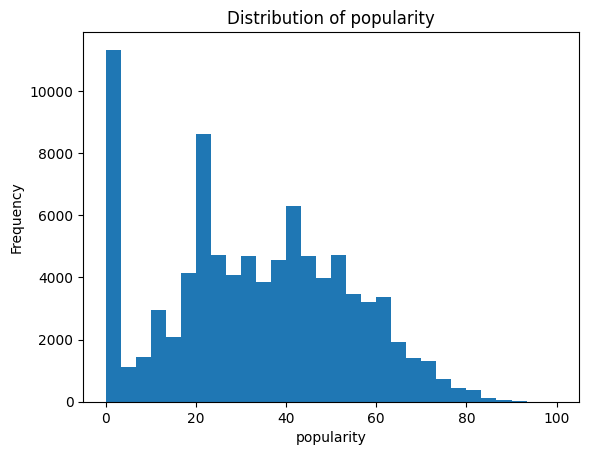

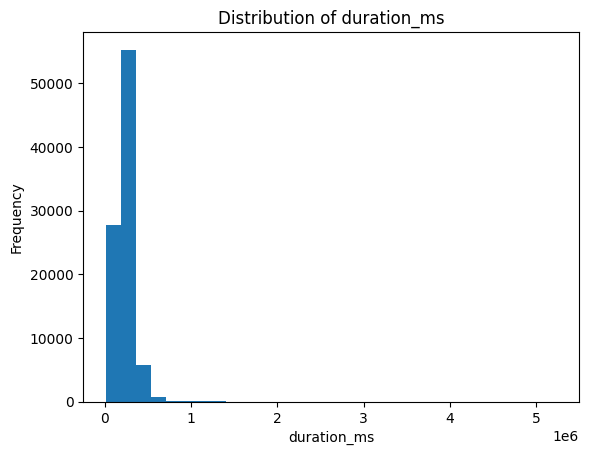

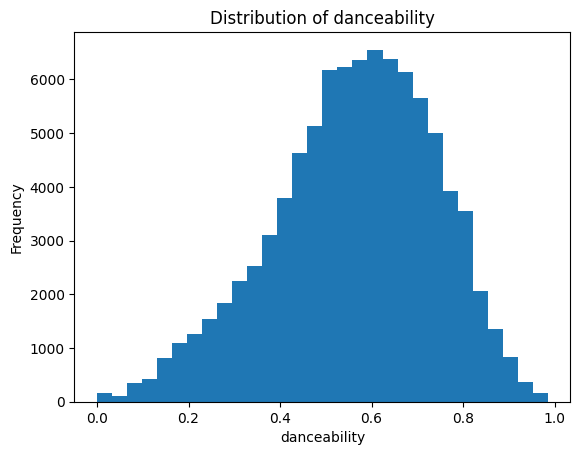

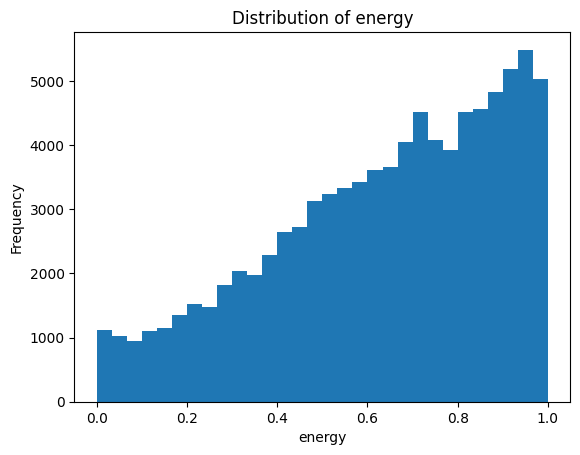

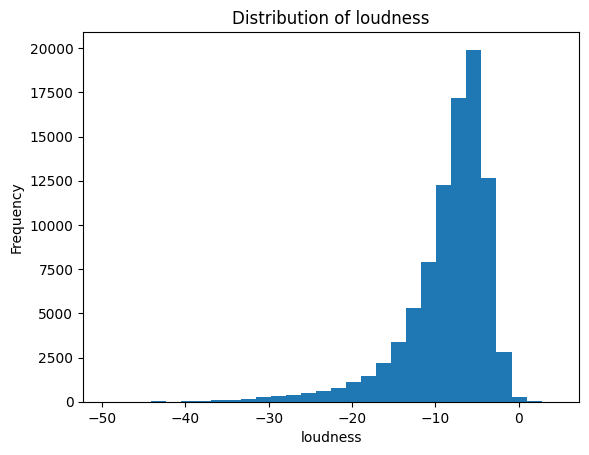

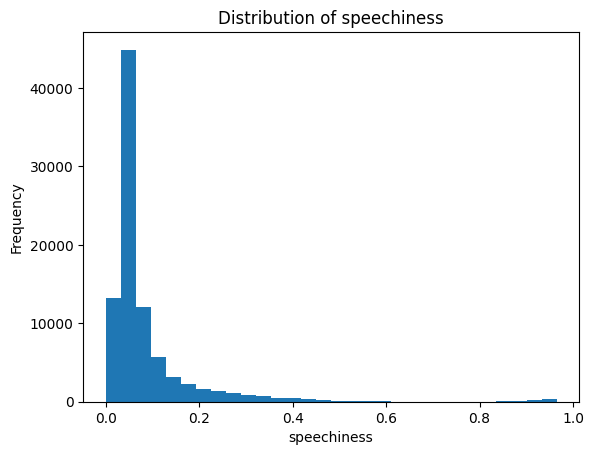

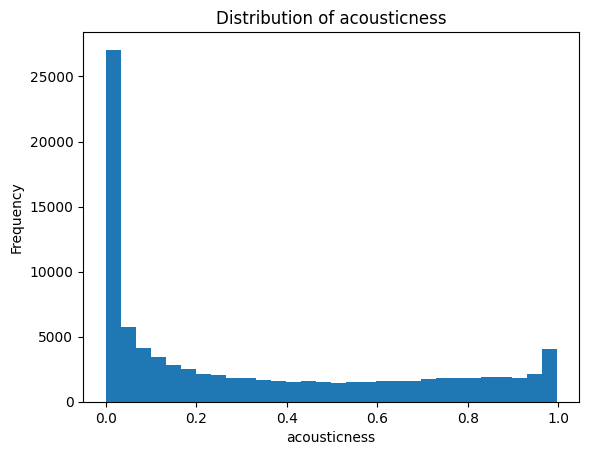

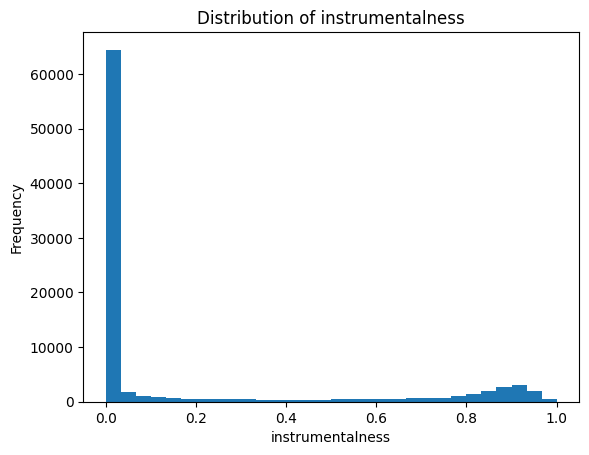

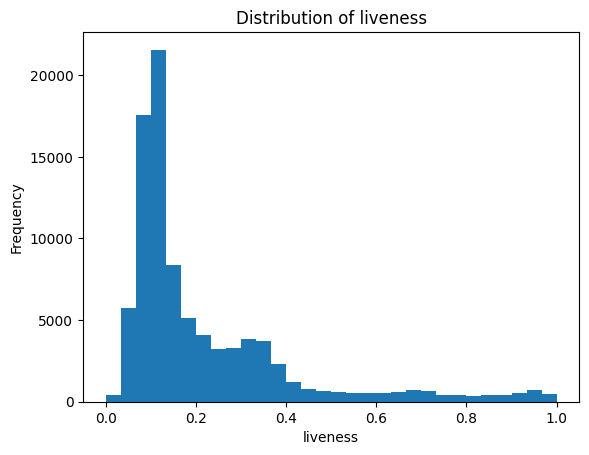

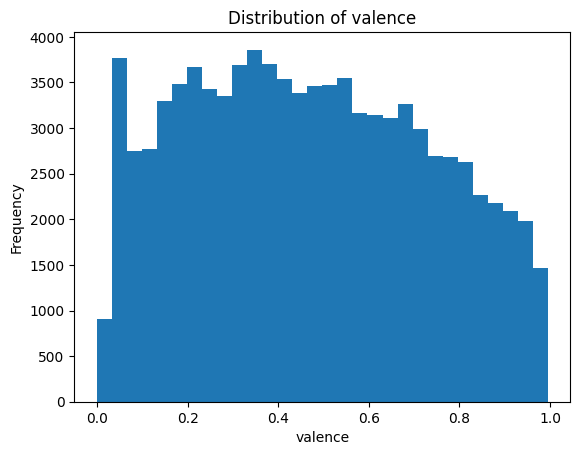

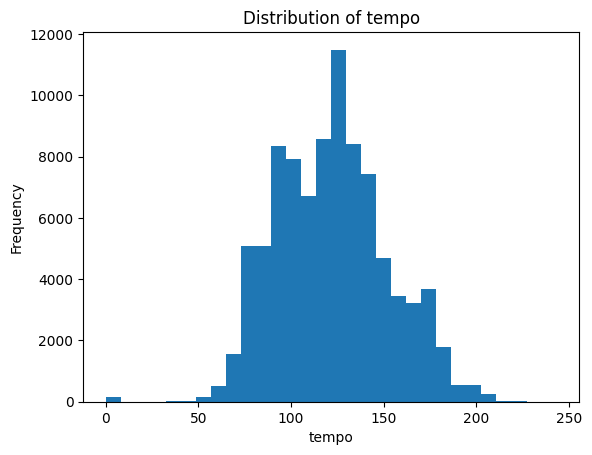

In [187]:
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for column in numerical_columns:
    plt.hist(df[column], bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

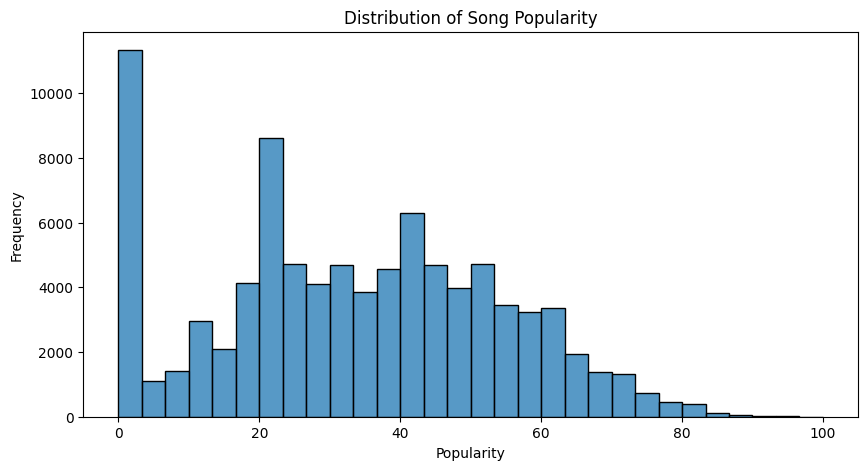

In [188]:
plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], kde=False, bins=30)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [189]:
#   Visualize the number of songs by genre. Which are the most common genres?
#   Rank genres by the average popularity of their songs. Which genres tend to have more popular songs?
#   Explore other characteristics (like danceability, energy, etc.) by genre. Are there any noticeable differences or trends?

In [190]:
top_20_popular_genres = genre_popularity.head(20).index
filtered_data = df[df['track_genre'].isin(top_20_popular_genres)]

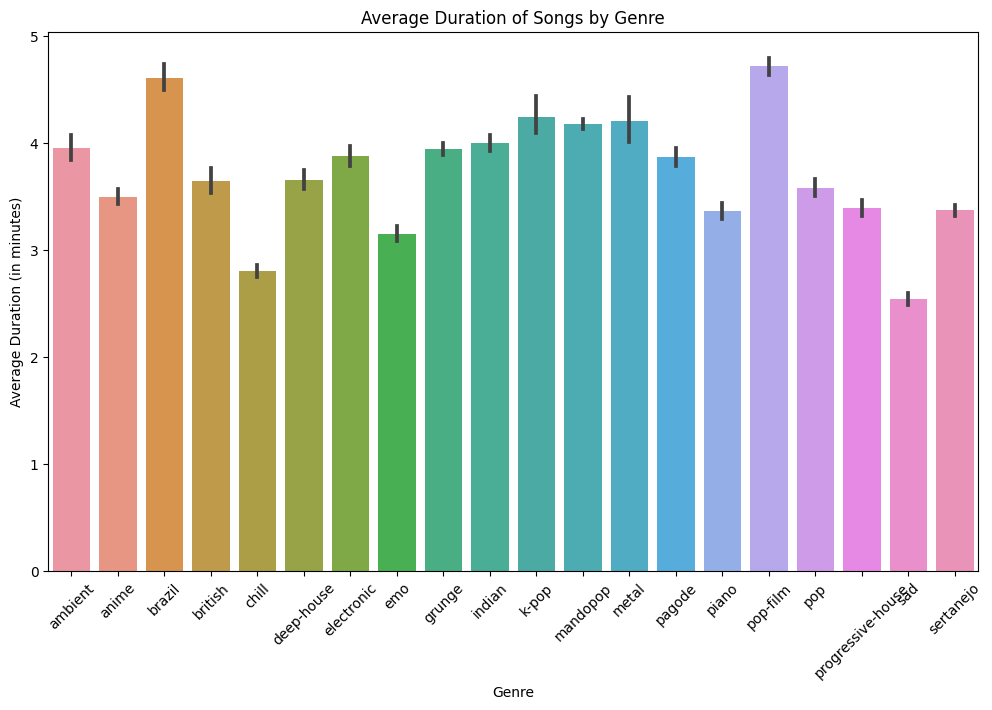

In [191]:
plt.figure(figsize=(12,7))
sns.barplot(x=filtered_data['track_genre'], y=filtered_data['duration_ms']/60000)  # Convert to minutes
plt.title('Average Duration of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Duration (in minutes)')
plt.xticks(rotation=45)
plt.show()

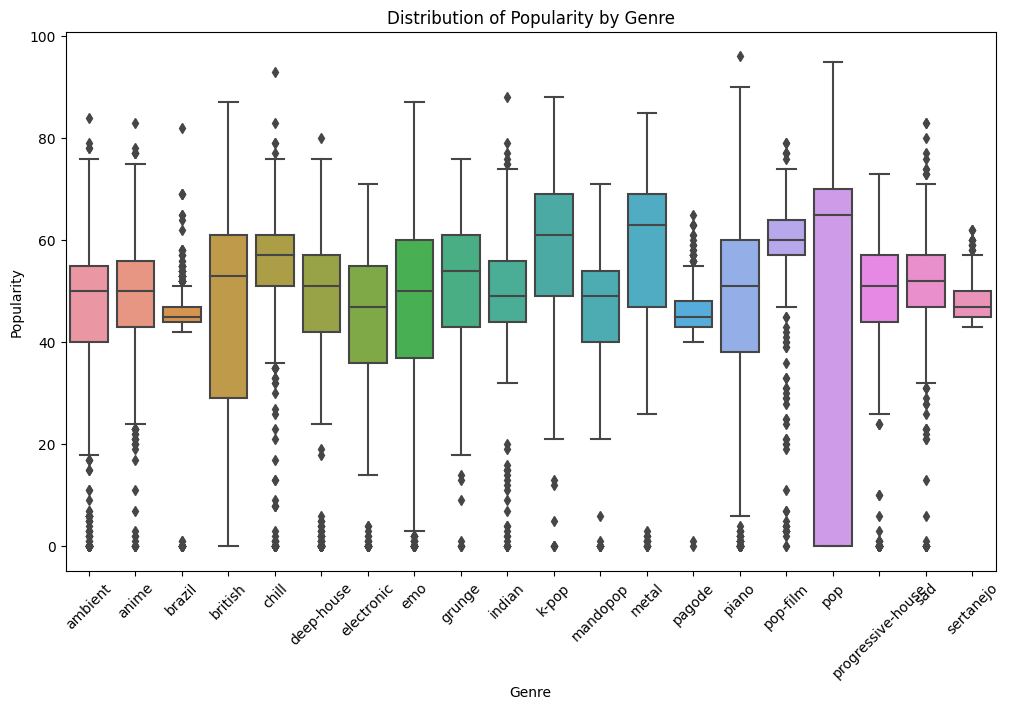

In [192]:
plt.figure(figsize=(12,7))
sns.boxplot(x=filtered_data['track_genre'], y=filtered_data['popularity'])
plt.title('Distribution of Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)
plt.show()


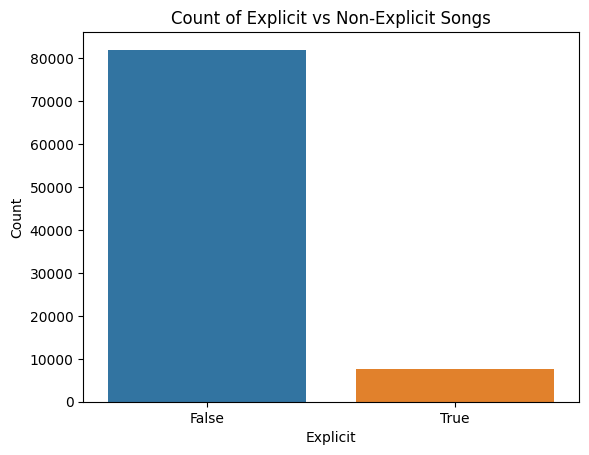

In [193]:
sns.countplot(x=df['explicit'])
plt.title('Count of Explicit vs Non-Explicit Songs')
plt.xlabel('Explicit')
plt.ylabel('Count')
plt.show()

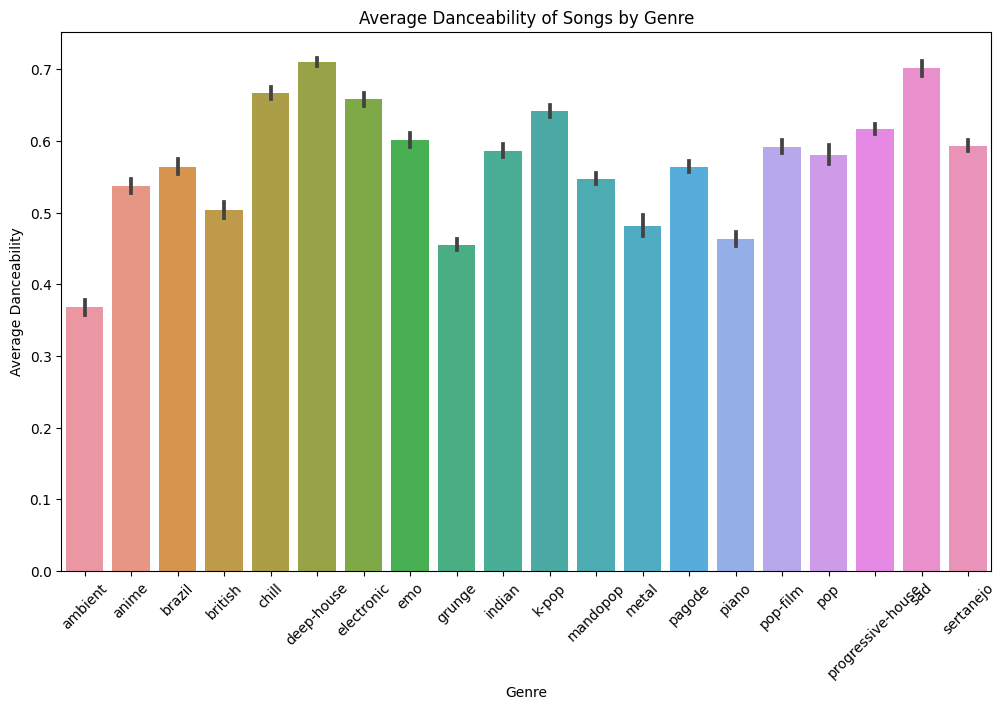

In [194]:
plt.figure(figsize=(12,7))
sns.barplot(x=filtered_data['track_genre'], y=filtered_data['danceability'])
plt.title('Average Danceability of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.xticks(rotation=45)
plt.show()

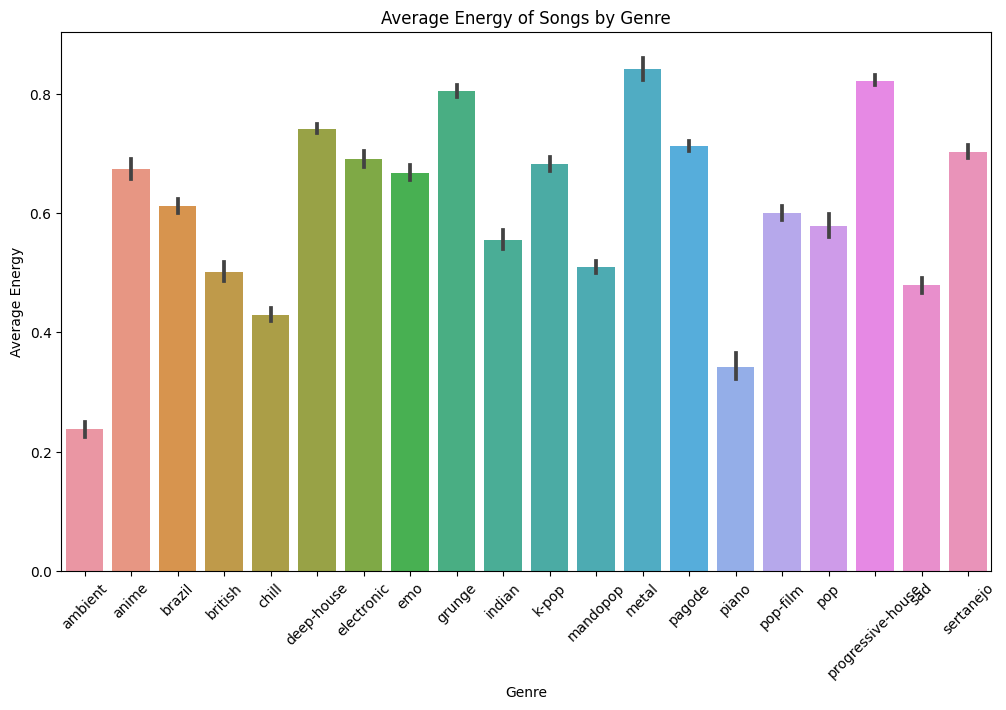

In [195]:
plt.figure(figsize=(12,7))
sns.barplot(x=filtered_data['track_genre'], y=filtered_data['energy'])
plt.title('Average Energy of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Energy')
plt.xticks(rotation=45)
plt.show()

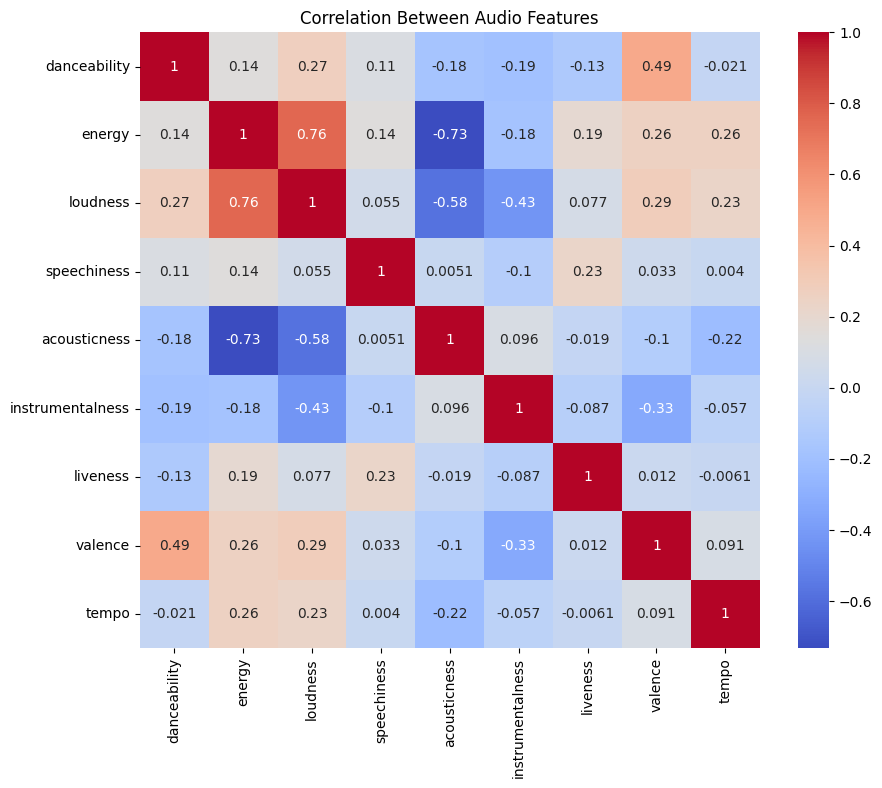

In [196]:
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
correlation = df[audio_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features')
plt.show()


# Part 2
## Goals of Part 2
    1. Pre-processing for PCA (encoding & scaling)
    2. PCA and explanations of results
    3. Clustering
## Relevant libraries for this part
    1. StandardScaler
    2. PCA
    3. KMeans



In [197]:
# Selecting relevant numerical features for PCA and clustering
features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]

In [198]:
# One-hot encode the 'track_genre' column
encoded_genres = pd.get_dummies(df['track_genre'], prefix='genre')

In [199]:
# Append the encoded data to the original dataframe and drop the original 'track_genre' column
data_encoded = pd.concat([df, encoded_genres], axis=1).drop('track_genre', axis=1)

In [200]:

features = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'] + list(encoded_genres.columns)
# Selecting relevant numerical features for PCA and clustering

X = data_encoded[features]

In [201]:
# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [202]:
# Conducting PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

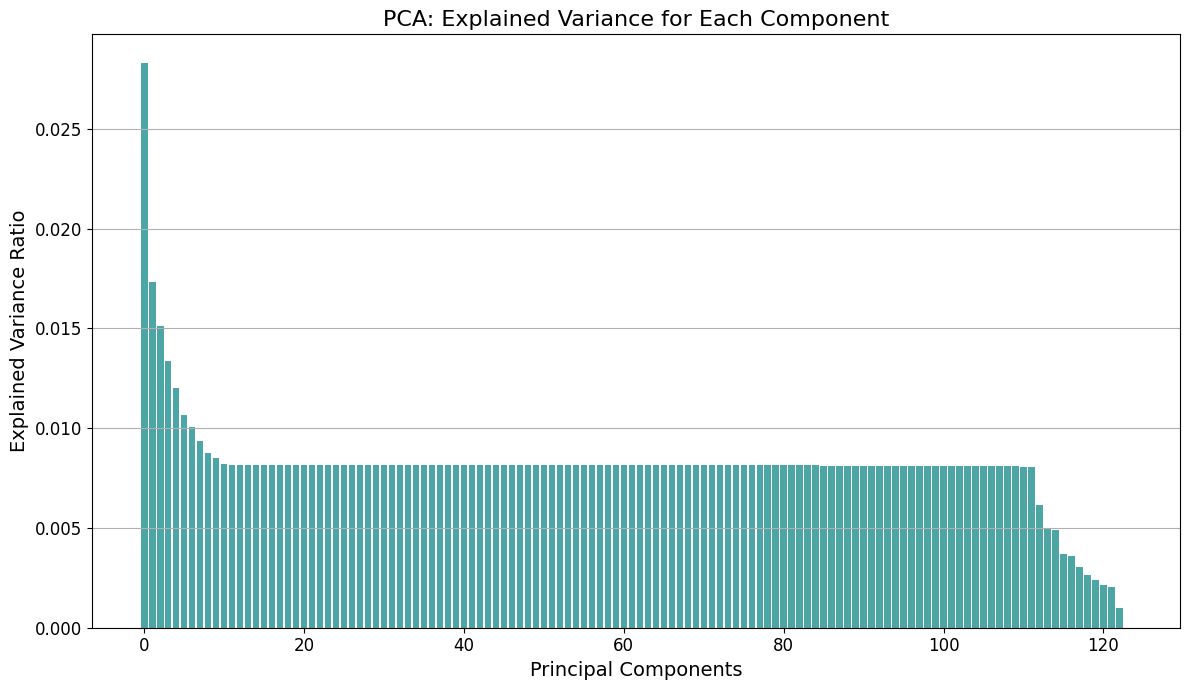

In [203]:
# Visualizing explained variance
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(12,7))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.7, align='center', color='teal')
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.xlabel('Principal Components', fontsize=14)
plt.title('PCA: Explained Variance for Each Component', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [204]:
# Reducing dimensions for visualization purposes (2 components)
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_scaled)

/Users/yasminesarraj/Documents/GitHub/AAU_TA_Notebooks/Streamlit/streamlit/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yasminesarraj/Documents/GitHub/AAU_TA_Notebooks/Streamlit/streamlit/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/yasminesarraj/Documents/GitHub/AAU_TA_Notebooks/Streamlit/streamlit/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init

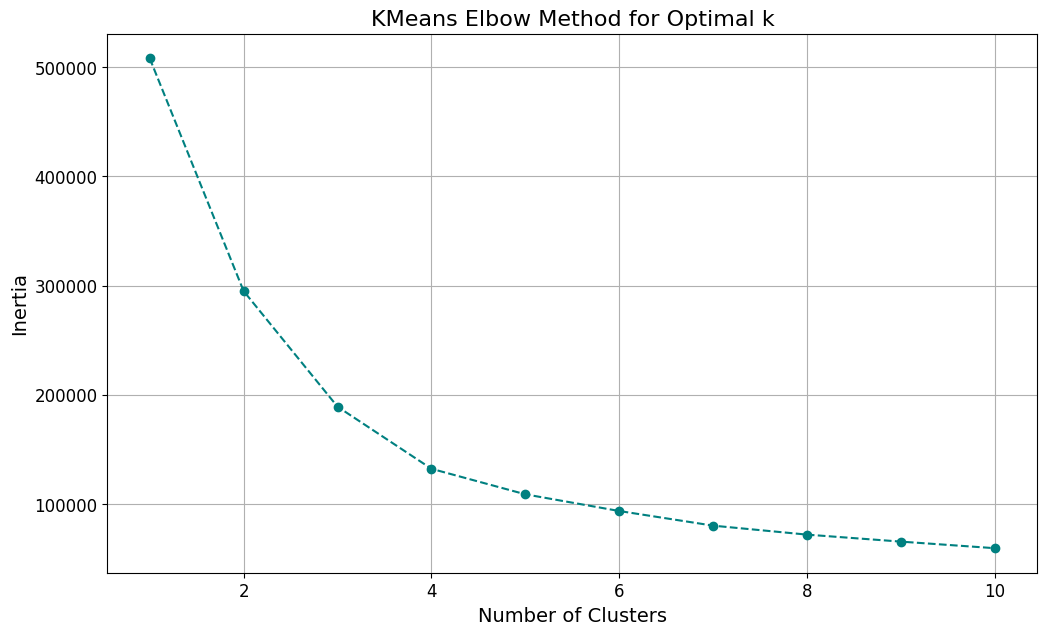

In [206]:
# Determining the optimal number of clusters for KMeans using the Elbow method
clusters = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_pca_2d)
    clusters.append(kmeans.inertia_)
plt.figure(figsize=(12,7))
plt.plot(range(1, 11), clusters, marker='o', linestyle='--', color='teal')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.title('KMeans Elbow Method for Optimal k', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

In [207]:
# Conducting KMeans clustering (assuming 4 clusters from the elbow method)
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_pca_2d)
labels = kmeans.labels_

/Users/yasminesarraj/Documents/GitHub/AAU_TA_Notebooks/Streamlit/streamlit/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


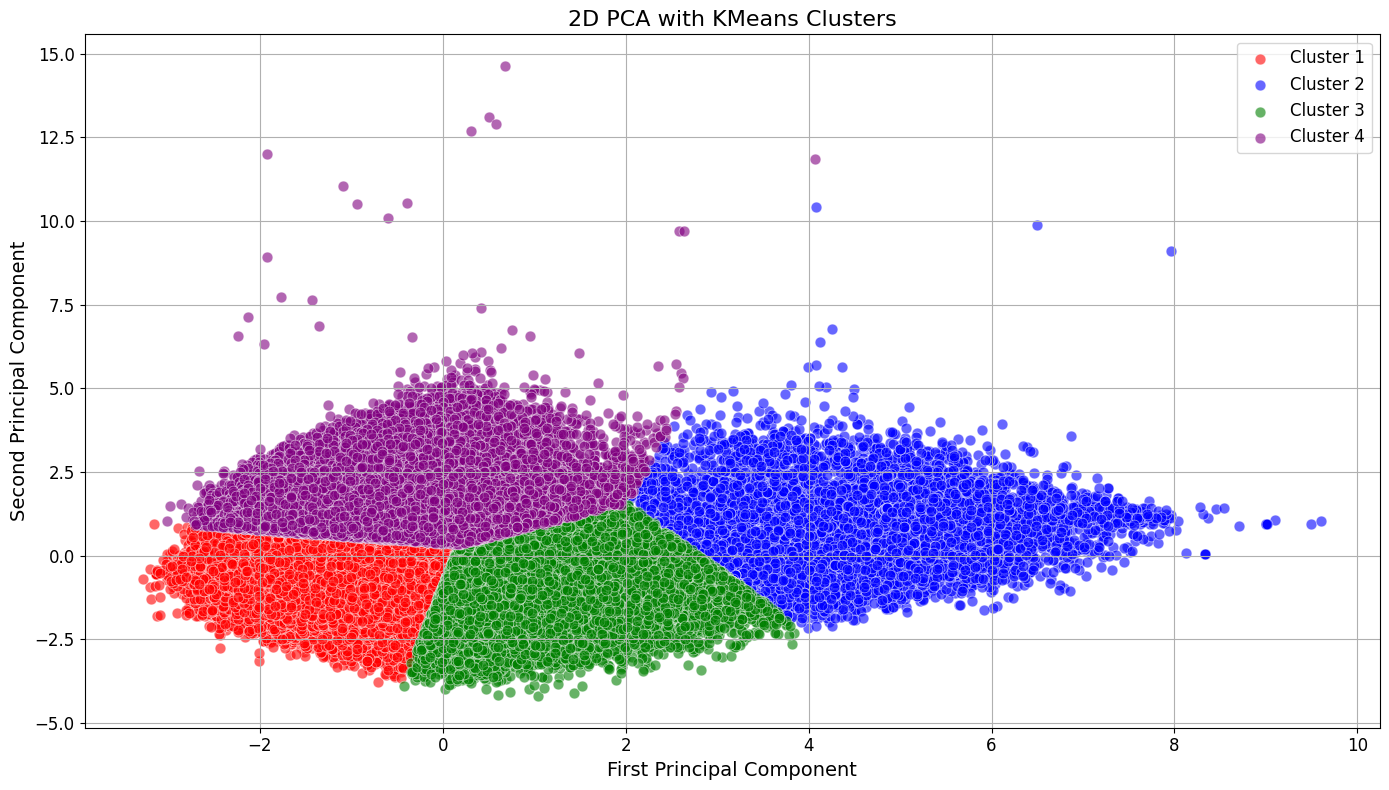

In [208]:
# Visualizing clusters
colors = ['red', 'blue', 'green', 'purple']
plt.figure(figsize=(14,8))
for i, color, label in zip(range(4), colors, ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']):
    plt.scatter(X_pca_2d[labels == i, 0], X_pca_2d[labels == i, 1], s=60, c=color, label=label, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.legend(fontsize=12)
plt.title('2D PCA with KMeans Clusters', fontsize=16)
plt.xlabel('First Principal Component', fontsize=14)
plt.ylabel('Second Principal Component', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 3 
## Goals of Part 3
    1. Vectorization   
    2. Cosine similarities
    3. Build and test recommender
    Objective: Develop a basic music recommender system that suggests songs based on textual data and put it in a small grad.io app
## Relevant libraries for this part
    1. linear_kernel
    2. TfidfVectorizer
    3. grad.io

In [209]:
title = df['track_name']

In [210]:
# Create a TF-IDF vectorizer to transform song titles into numerical vectors
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['track_name'])

In [211]:
# Compute the cosine similarity between song titles
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
cosine_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Function to get song recommendations based on a given title
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = df.index[df['track_name'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    return df['track_name'].iloc[song_indices]

In [ ]:
# Example: Get recommendations for a song title
recommendations = get_recommendations("As It Was")
print(recommendations)

1               Ghost - Acoustic
2                 To Begin Again
3     Can't Help Falling In Love
4                        Hold On
5           Days I Will Remember
6                  Say Something
7                      I'm Yours
8                          Lucky
9                         Hunger
10          Give Me Your Forever
Name: track_name, dtype: object
